## 2.2 시계열 분해

### 예제 1

[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"

[1] -0.05359649  0.61055921  1.37564693  2.51682018  3.00028509  2.32921053
 [7]  0.81293860 -1.25052632 -3.05458333 -3.25194079 -2.06969298 -0.96512061

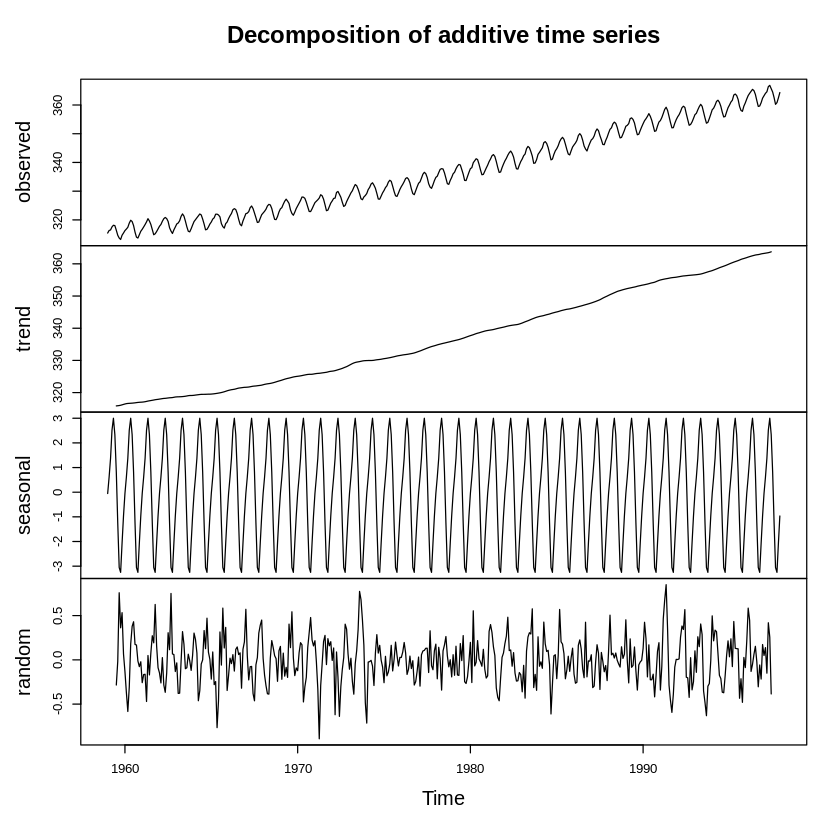

In [1]:
m = decompose(co2)
names(m)
m$figure
plot(m)

### 예제 2

In [2]:
data("AirPassengers")
ap = AirPassengers
ap
class(ap)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


[1] "ts"

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,1,2,3,4,5,6,7,8,9,10,11,12
1950,1,2,3,4,5,6,7,8,9,10,11,12
1951,1,2,3,4,5,6,7,8,9,10,11,12
1952,1,2,3,4,5,6,7,8,9,10,11,12
1953,1,2,3,4,5,6,7,8,9,10,11,12
1954,1,2,3,4,5,6,7,8,9,10,11,12
1955,1,2,3,4,5,6,7,8,9,10,11,12
1956,1,2,3,4,5,6,7,8,9,10,11,12
1957,1,2,3,4,5,6,7,8,9,10,11,12
1958,1,2,3,4,5,6,7,8,9,10,11,12


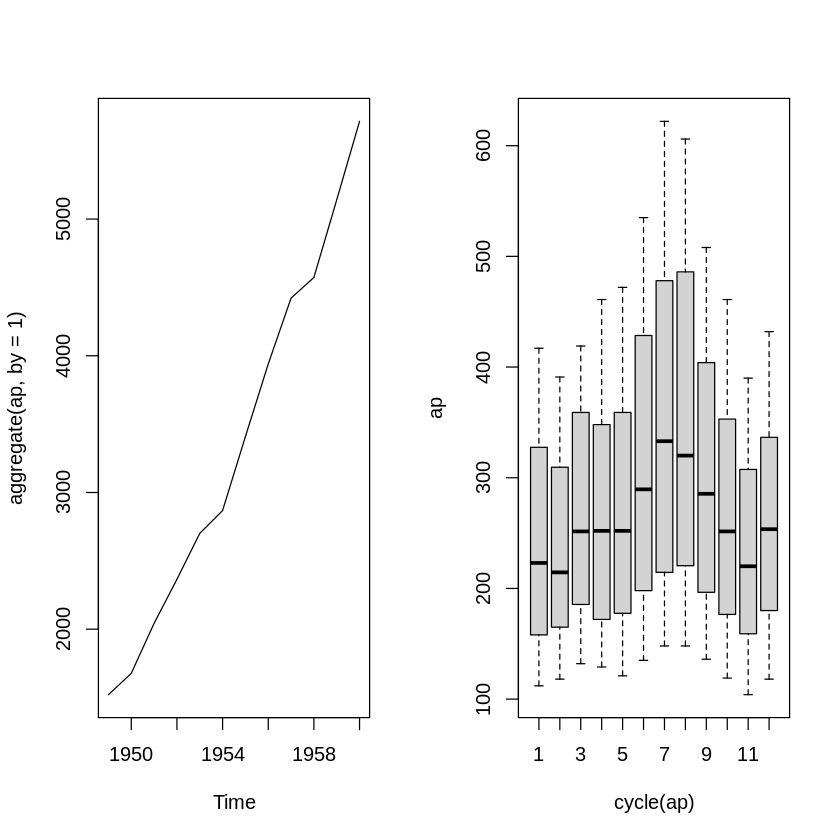

In [3]:
par(mfrow = c(1, 2))
plot(aggregate(ap, by = 1))
cycle(ap)
boxplot(ap ~ cycle(ap))

In [6]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



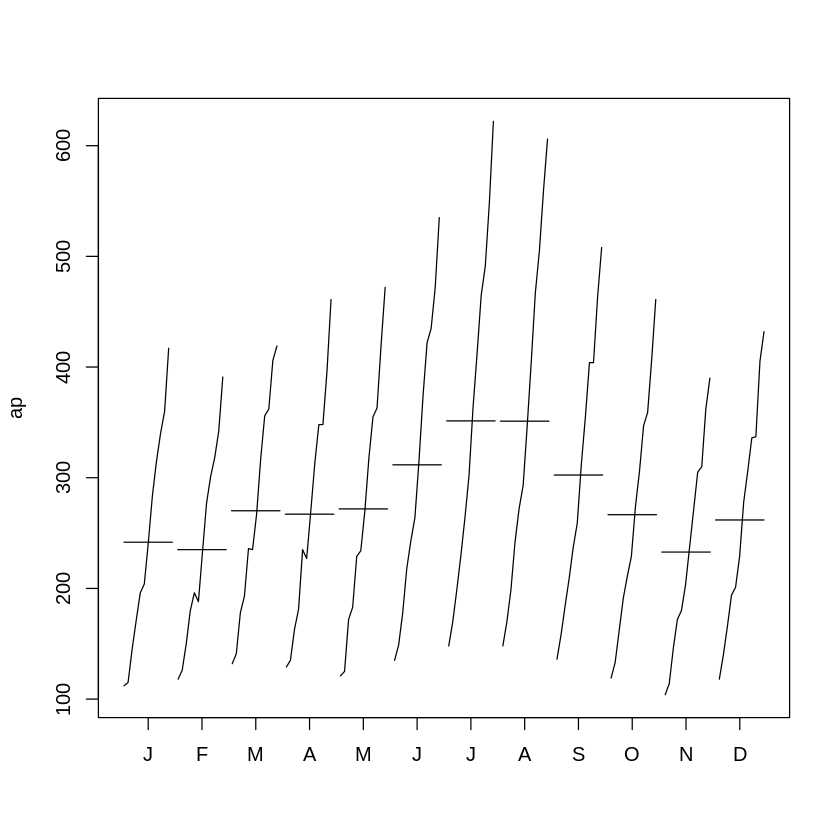

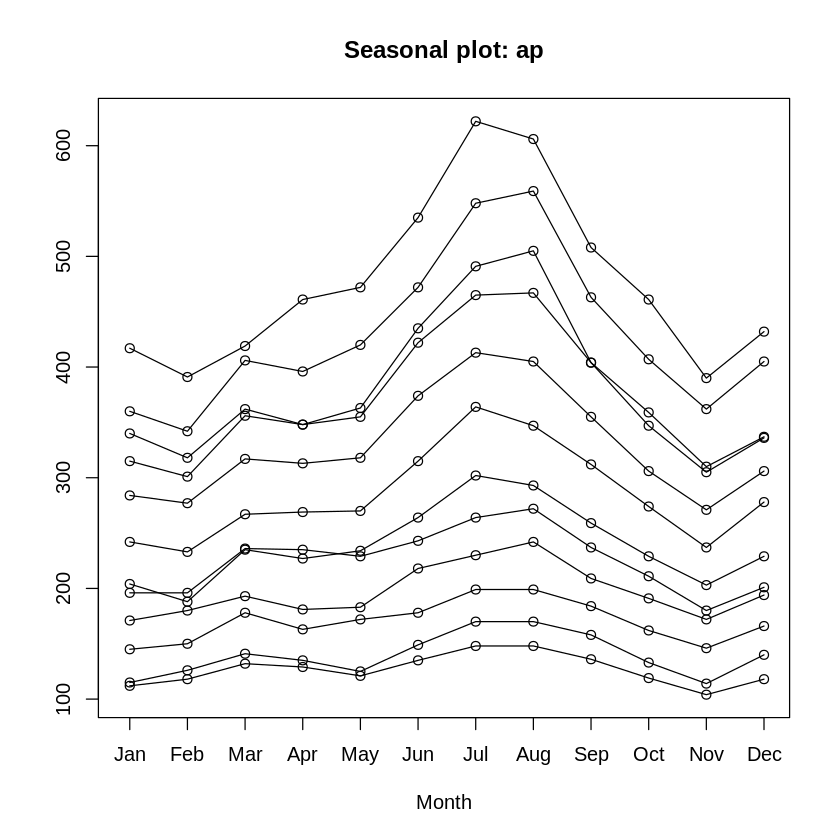

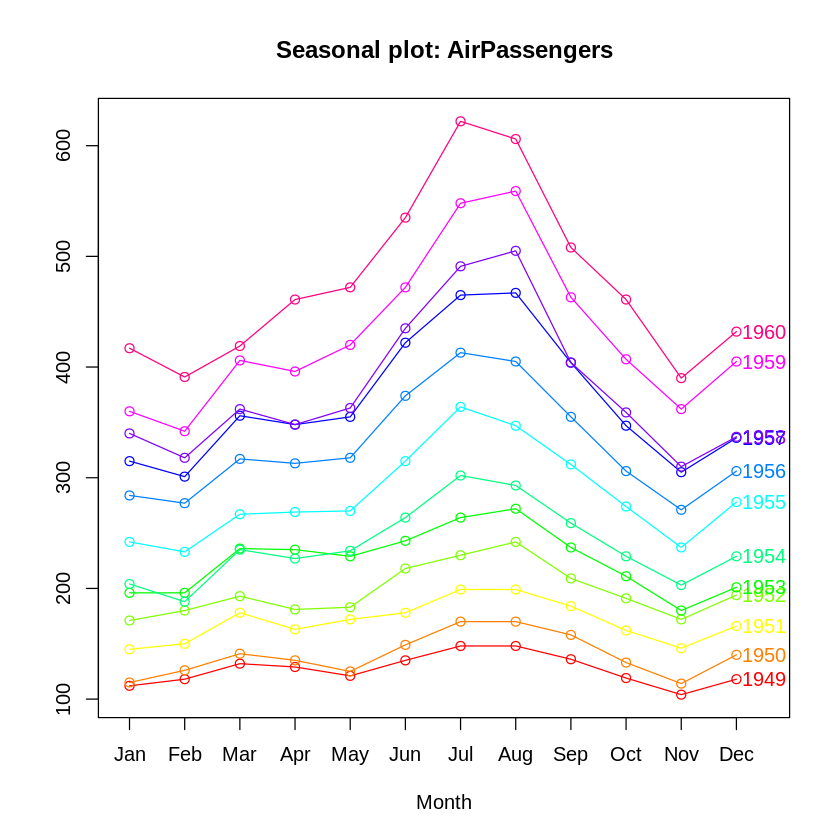

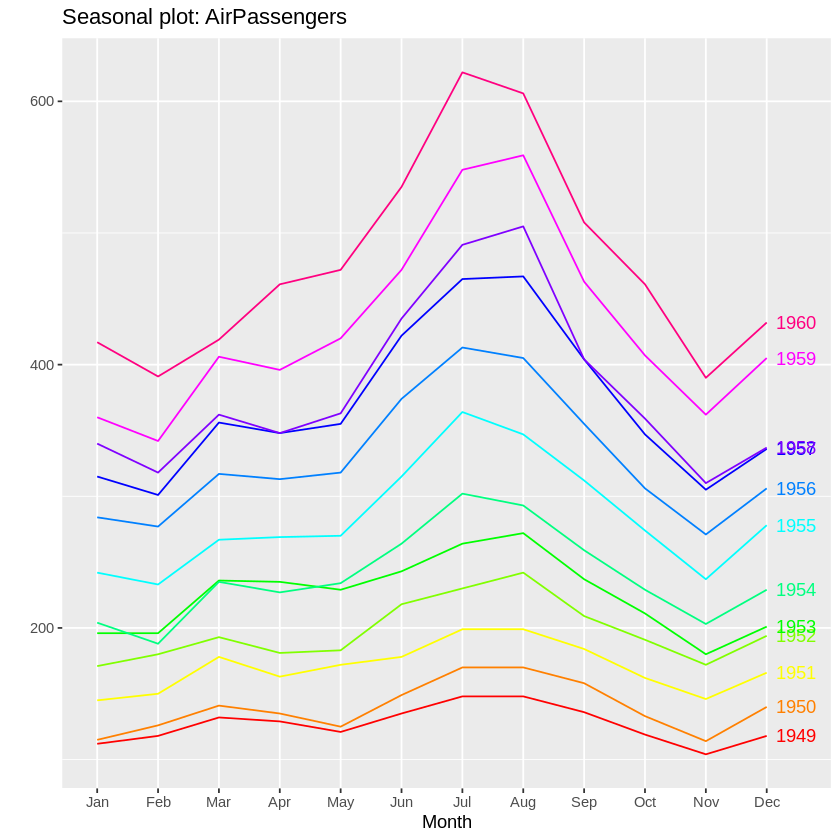

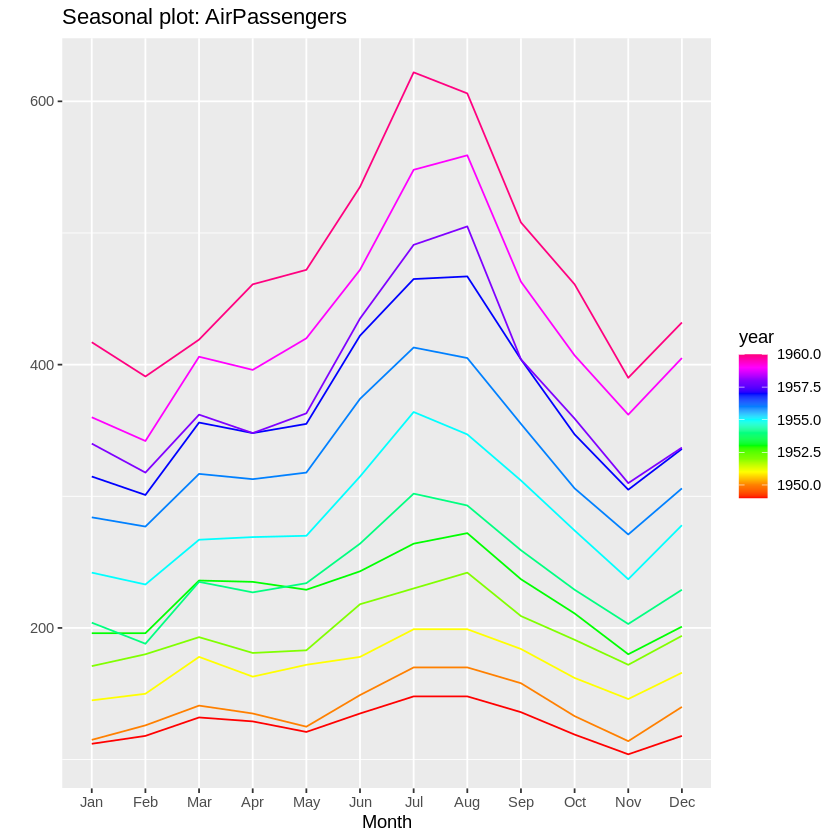

In [7]:
monthplot(ap)
library(forecast)
seasonplot(ap)
seasonplot(AirPassengers, col = rainbow(12), year.labels = TRUE)
ggseasonplot(AirPassengers, col = rainbow(12), year.labels = TRUE)
ggseasonplot(AirPassengers, col = rainbow(12), continuous = TRUE)

[1] "figure"   "random"   "seasonal" "trend"    "type"     "x"

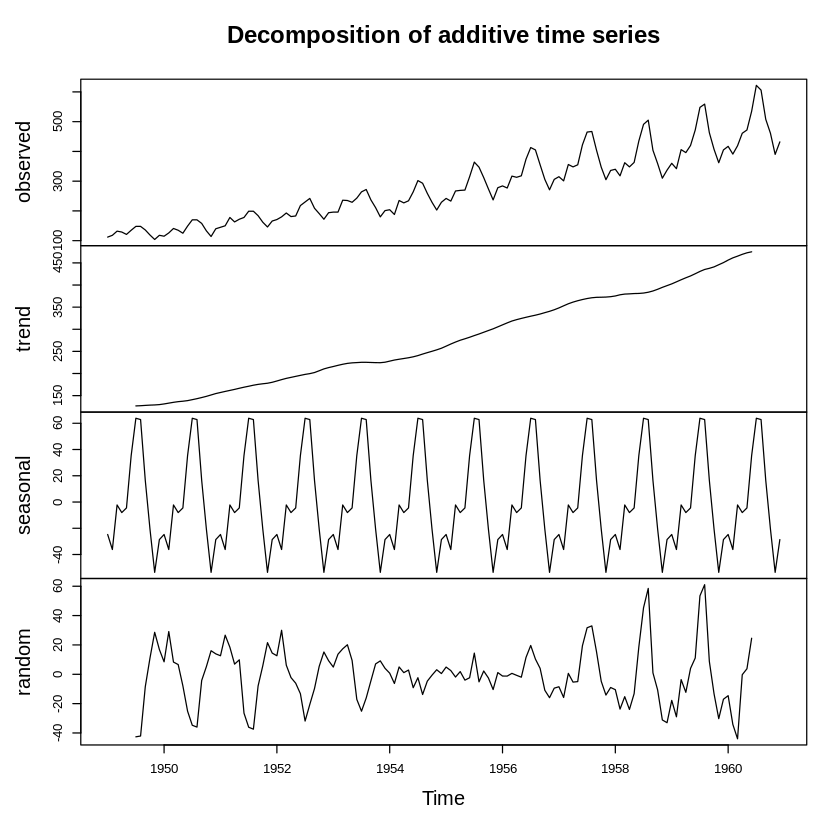

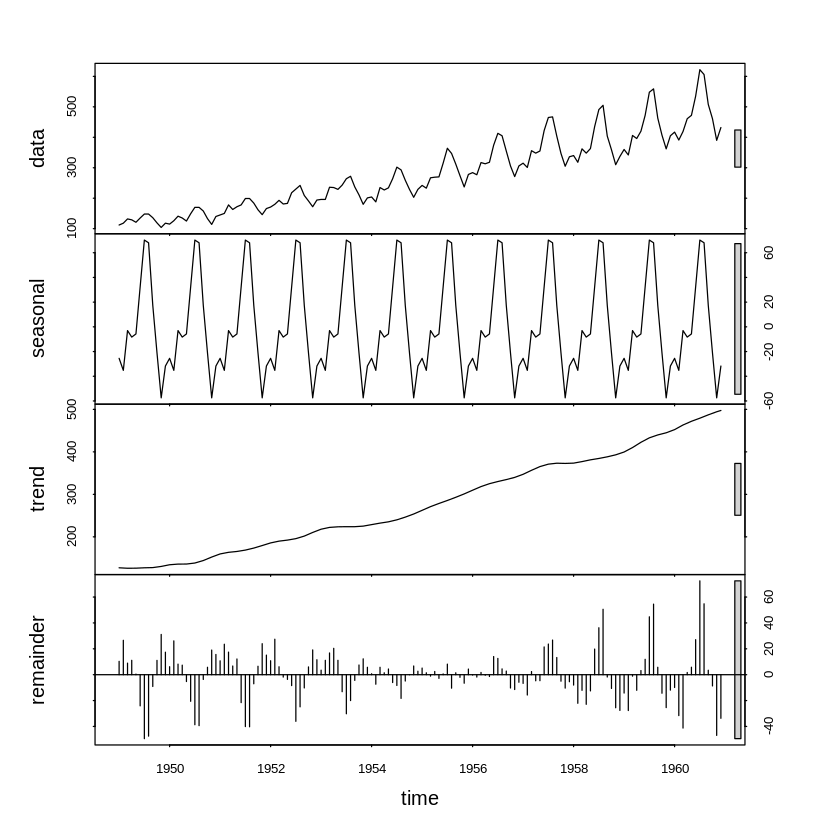

In [8]:
d = decompose(ap, type = "additive")
plot(d)
ls(d)
plot(stl(ap, s.window = "period"))

## 2.3 시계열 변화점 탐지

In [9]:
install.packages("changepoint")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Successfully loaded changepoint package version 2.2.4
 See NEWS for details of changes.



[1] 100 200

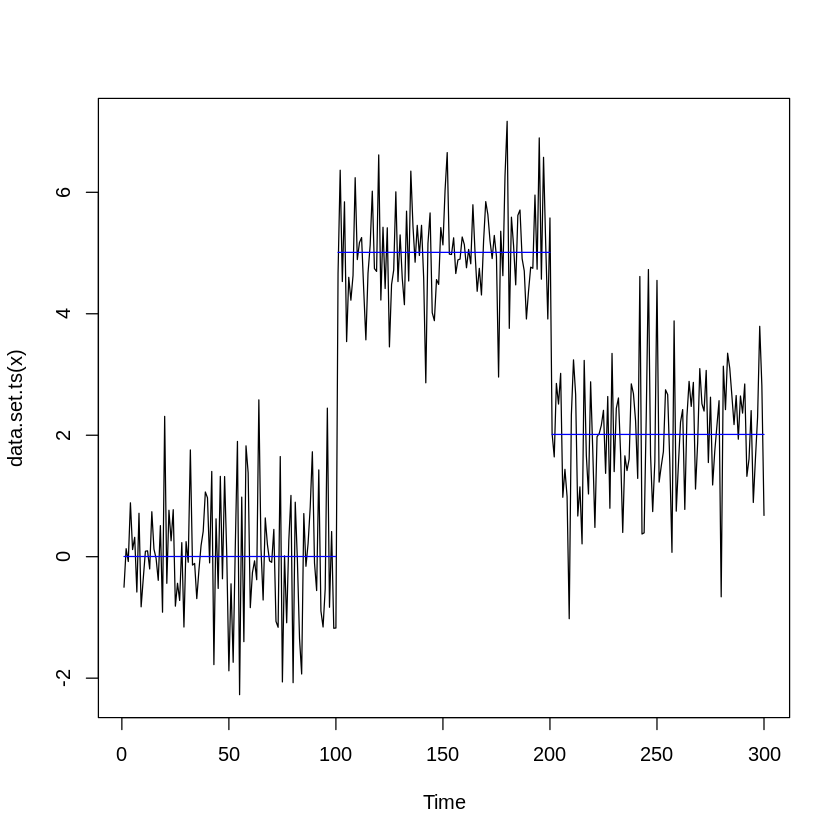

In [10]:
library(changepoint)
set.seed(100)
y = c(rnorm(100, 0, 1), rnorm(100, 5, 1), rnorm(100, 2, 1))
ansmean = cpt.mean(y, method = "PELT")
cpts(ansmean)
plot(ansmean, cpt.col = "blue")

[1] 100 200

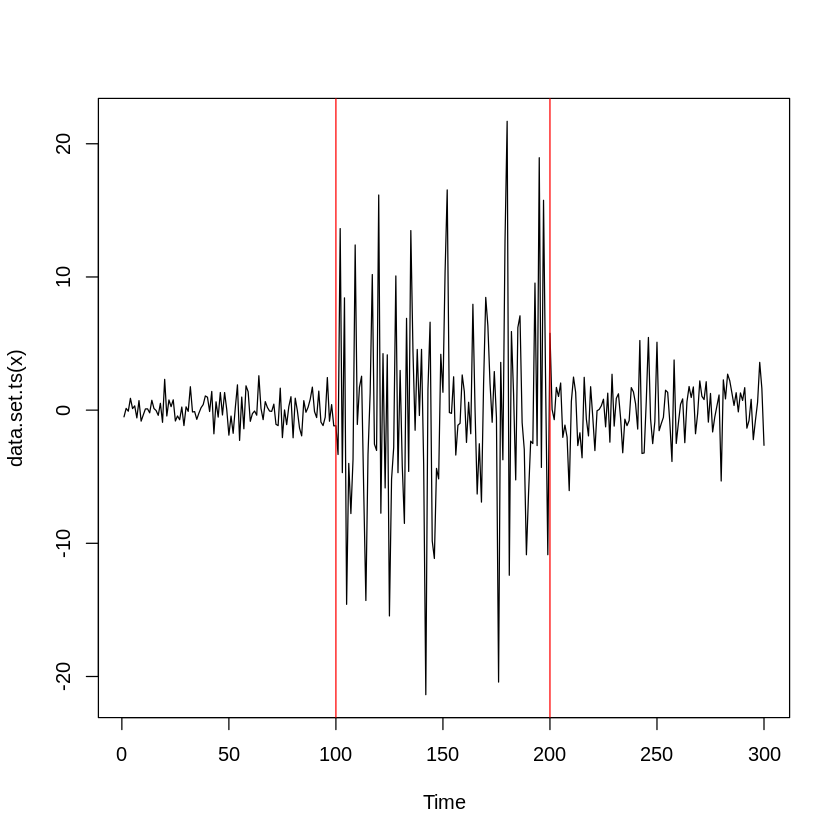

In [11]:
set.seed(100)
x = c(rnorm(100, 0, 1), rnorm(100, 0, 10), rnorm(100, 0, 2))
ansvar = cpt.var(x, method = "PELT")
cpts(ansvar)
plot(ansvar)

[1]  98 100

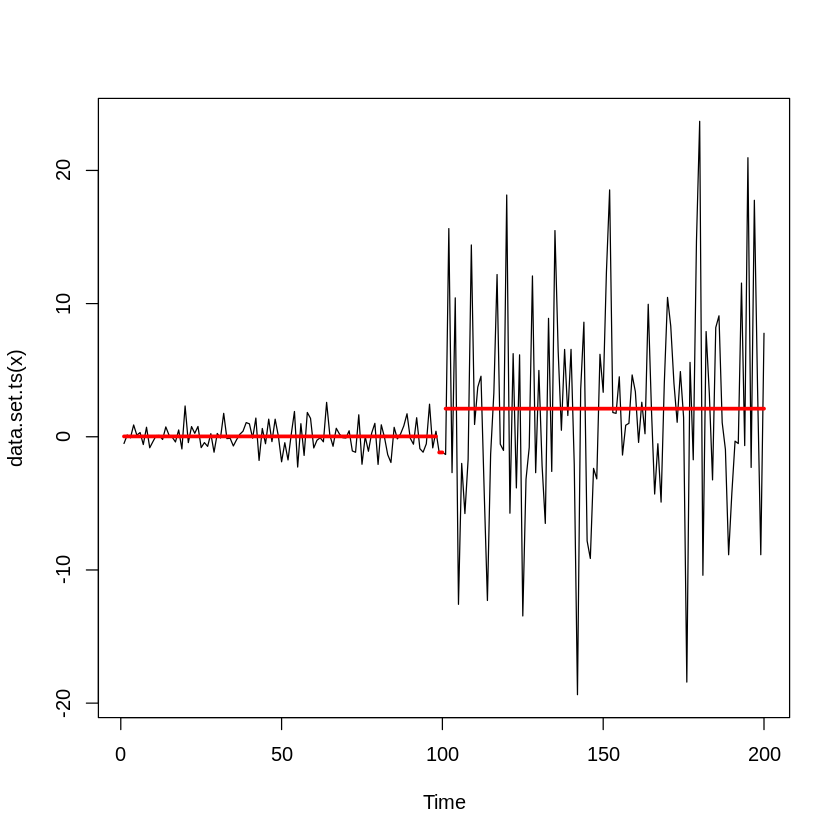

In [12]:
set.seed(100)
z = c(rnorm(100, 0, 1), rnorm(100, 2, 10))
ansmeanvar = cpt.meanvar(z, method = "PELT")
cpts(ansmeanvar)
plot(ansmeanvar, cpt.width = 3)

### 예제 3

In [13]:
install.packages("strucchange")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sandwich’




In [14]:
library(strucchange)
set.seed(200)
y = c(rnorm(20), 2 + rnorm(20), 1 + rnorm(20))
b = breakpoints(y ~ 1)
f = Fstats(y ~ 1)
summary(b)

Loading required package: sandwich




	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = y ~ 1)

Breakpoints at observation number:
                      
m = 1      20         
m = 2      20    41   
m = 3   10 20    41   
m = 4   10 20 33 42   
m = 5   10 20 33 42 51

Corresponding to breakdates:
                                                                       
m = 1                     0.333333333333333                            
m = 2                     0.333333333333333      0.683333333333333     
m = 3   0.166666666666667 0.333333333333333      0.683333333333333     
m = 4   0.166666666666667 0.333333333333333 0.55 0.7                   
m = 5   0.166666666666667 0.333333333333333 0.55 0.7               0.85

Fit:
                                             
m   0      1      2      3      4      5     
RSS  77.57  47.38  36.18  35.22  34.34  34.09
BIC 193.87 172.48 164.48 171.06 177.73 185.49

In [15]:
summary(f)

           Length Class   Mode   
Fstats     43     ts      numeric
nreg        1     -none-  numeric
nobs        1     -none-  numeric
par         1     -none-  numeric
call        2     -none-  call   
formula     3     formula call   
breakpoint  1     -none-  numeric
RSS         1     -none-  numeric
datatsp     3     -none-  numeric

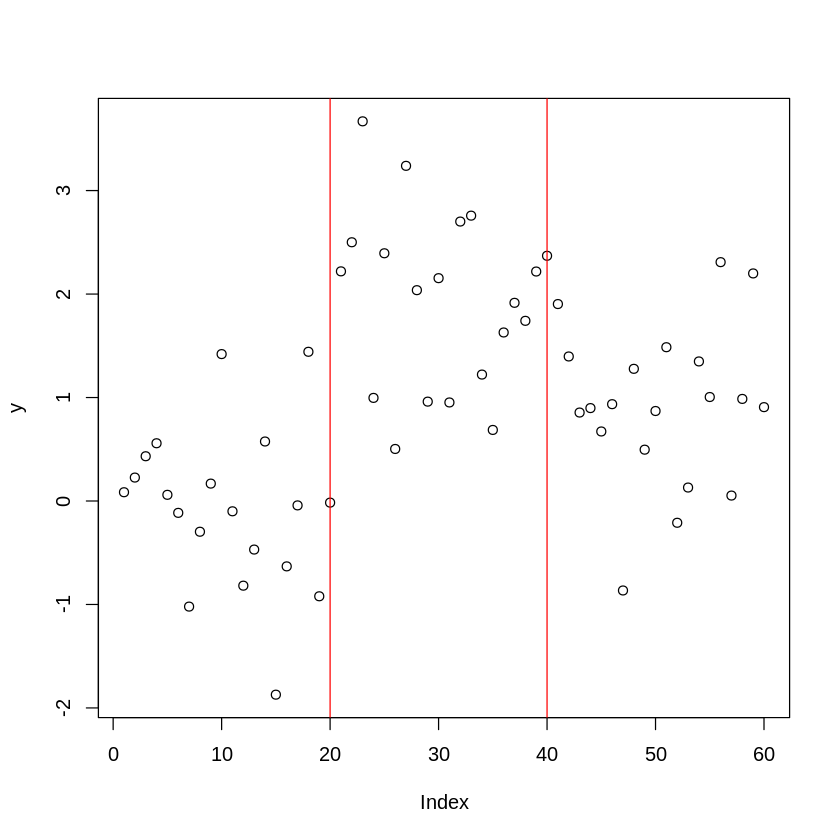

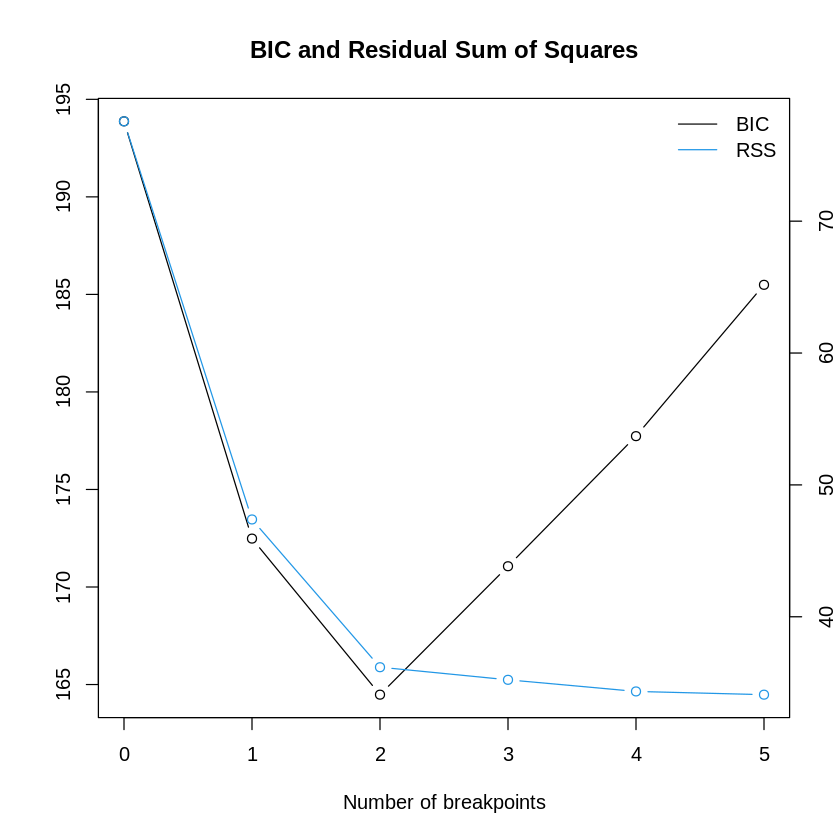

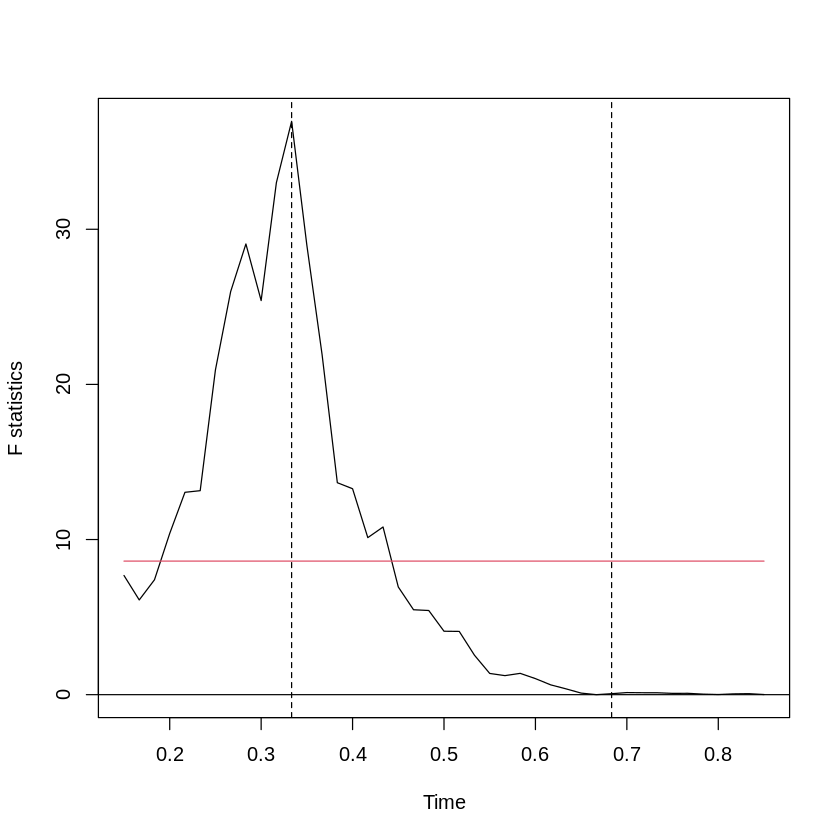

In [16]:
plot(y)
abline(v = c(20, 40), col = "red")
plot(b)
plot(f)
lines(b)

In [17]:
install.packages("EnvCpt")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: MASS

Fitting 12 models



  |======================================================================| 100%


,mean,meancpt,meanar1,meanar2,meanar1cpt,meanar2cpt,trend,trendcpt,trendar1,trendar2,trendar1cpt,trendar2cpt
logLik,185.6835,154.9912,173.7238,169.8445,173.7238,173.7238,179.3435,143.7112,168.8278,163.8989,142.2805,163.8989
nparam,2.0000,5.0000,3.0000,4.0000,3.0000,4.0000,3.0000,7.0000,4.0000,5.0000,9.0000,11.0000


[1] 20 60

$mean
[1] -0.06675716  1.43799782

$variance
[1] 0.5860781 0.8914700

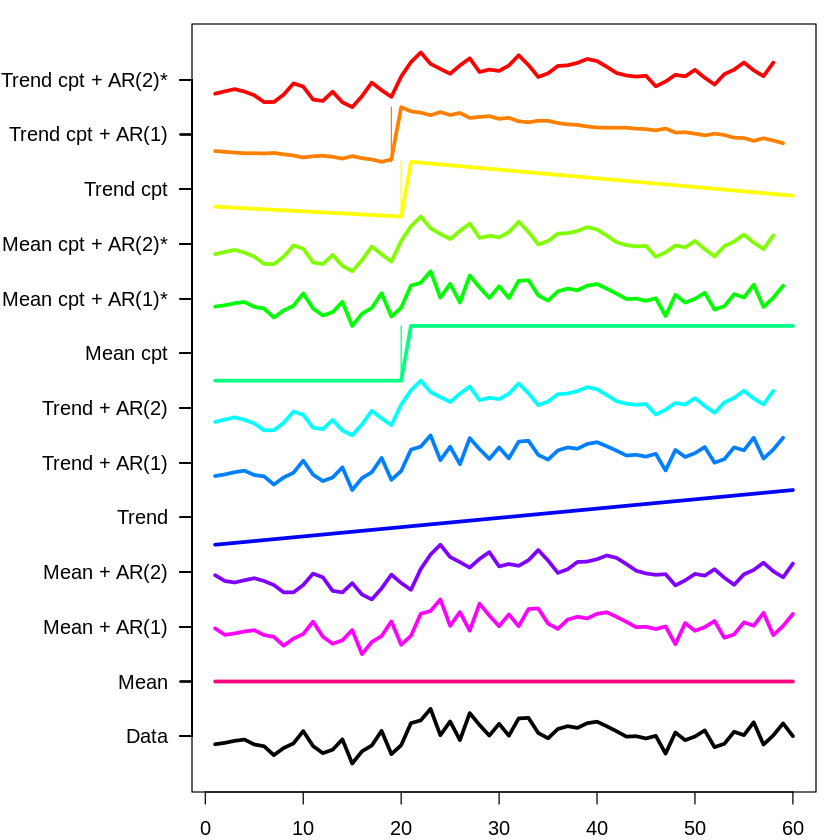

In [18]:
library(EnvCpt)
fit_envcpt = envcpt(y)
fit_envcpt$summary
plot(fit_envcpt)
fit_envcpt$meancpt@cpts
fit_envcpt$meancpt@param.est

In [19]:
install.packages("segmented")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:forecast’:

    getResponse





	***Regression Model with Segmented Relationship(s)***

Call: 
segmented.lm(obj = fit_lm, seg.Z = ~x, npsi = 2)

Estimated Break-Point(s):
          Est. St.Err
psi1.x 19.482  1.060
psi2.x 21.468  0.992

Meaningful coefficients of the linear terms:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.22892    0.40567   0.564    0.575
x           -0.03037    0.03558  -0.854    0.397
U1.x         1.33696    1.20184   1.112       NA
U2.x        -1.34779    1.20138  -1.122       NA

Residual standard error: 0.8495 on 54 degrees of freedom
Multiple R-Squared: 0.4977,  Adjusted R-squared: 0.4512 

Boot restarting based on 10 samples. Last fit:
Convergence *not* attained in 39 iterations (rel. change 0.014334)

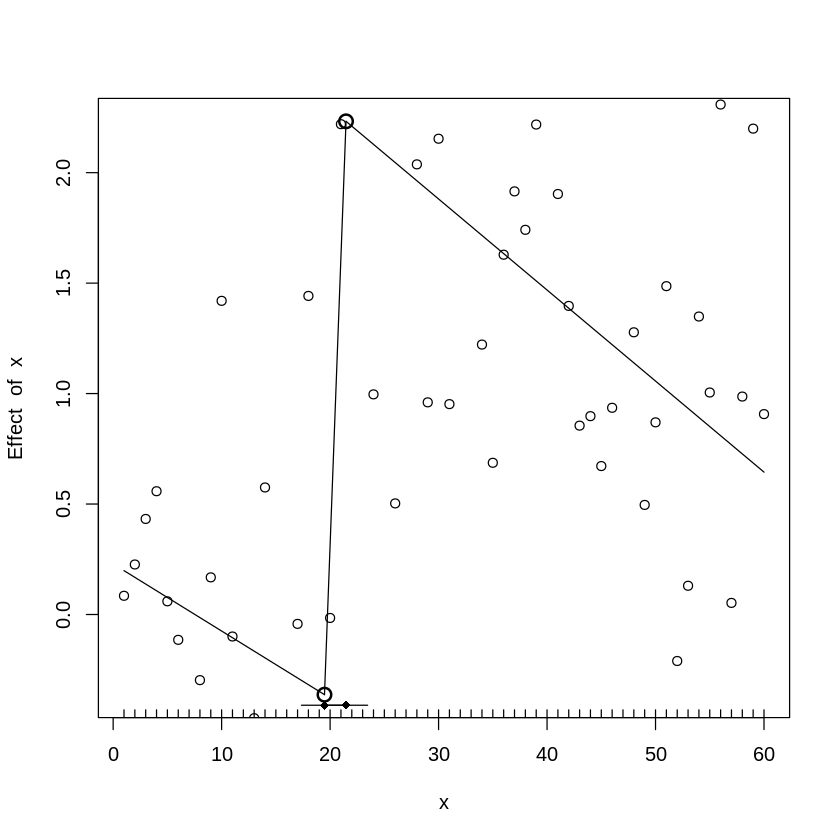

In [20]:
library(segmented)
x = c(1:60)
df = data.frame(x = x, y = y)
fit_lm = lm(y ~ 1 + x)
fit_segmented = segmented(fit_lm, seg.Z = ~ x, npsi = 2)
summary(fit_segmented)
plot(fit_segmented)
points(df)
lines.segmented(fit_segmented)
points.segmented(fit_segmented)

## 2.4 시계열 결측값 대치

### 예제 4

In [21]:
install.packages("imputeTS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘markdown’, ‘png’, ‘jpeg’, ‘gridtext’, ‘ggtext’, ‘stinepack’




In [22]:
library(imputeTS)
x = ts(c(1, 2, 3, 4, 5, 6, 7, 8, NA, NA, 11, 12))
na_mean(x)
na_mean(x, option = "median")
na_interpolation(x)
imp = na_kalman(tsAirgap)


Attaching package: ‘imputeTS’


The following object is masked from ‘package:zoo’:

    na.locf




A Time Series:
 [1]  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  5.9  5.9 11.0 12.0

A Time Series:
 [1]  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  5.5  5.5 11.0 12.0

A Time Series:
 [1]  1  2  3  4  5  6  7  8  9 10 11 12

## 2.6 Holt-Winter's 방법

### 예제 5

,Qtr1,Qtr2,Qtr3,Qtr4
1960,160.1,129.7,84.8,120.1
1961,160.1,124.9,84.8,116.9
1962,169.7,140.9,89.7,123.3
1963,187.3,144.1,92.9,120.1
1964,176.1,147.3,89.7,123.3
1965,185.7,155.3,99.3,131.3
1966,200.1,161.7,102.5,136.1
1967,204.9,176.1,112.1,140.9
1968,227.3,195.3,115.3,142.5
1969,244.9,214.5,118.5,153.7


$x
       Qtr1   Qtr2   Qtr3   Qtr4
1960  160.1  129.7   84.8  120.1
1961  160.1  124.9   84.8  116.9
1962  169.7  140.9   89.7  123.3
1963  187.3  144.1   92.9  120.1
1964  176.1  147.3   89.7  123.3
1965  185.7  155.3   99.3  131.3
1966  200.1  161.7  102.5  136.1
1967  204.9  176.1  112.1  140.9
1968  227.3  195.3  115.3  142.5
1969  244.9  214.5  118.5  153.7
1970  244.9  216.1  188.9  142.5
1971  301.0  196.9  136.1  267.3
1972  317.0  230.5  152.1  336.2
1973  371.4  240.1  158.5  355.4
1974  449.9  286.6  179.3  403.4
1975  491.5  321.8  177.7  409.8
1976  593.9  329.8  176.1  483.5
1977  584.3  395.4  187.3  485.1
1978  669.2  421.0  216.1  509.1
1979  827.7  467.5  209.7  542.7
1980  840.5  414.6  217.7  670.8
1981  848.5  437.0  209.7  701.2
1982  925.3  443.4  214.5  683.6
1983  917.3  515.5  224.1  694.8
1984  989.4  477.1  233.7  730.0
1985 1087.0  534.7  281.8  787.6
1986 1163.9  613.1  347.4  782.8

$seasonal
          Qtr1      Qtr2      Qtr3      Qtr4
1960 1.4537107 0.

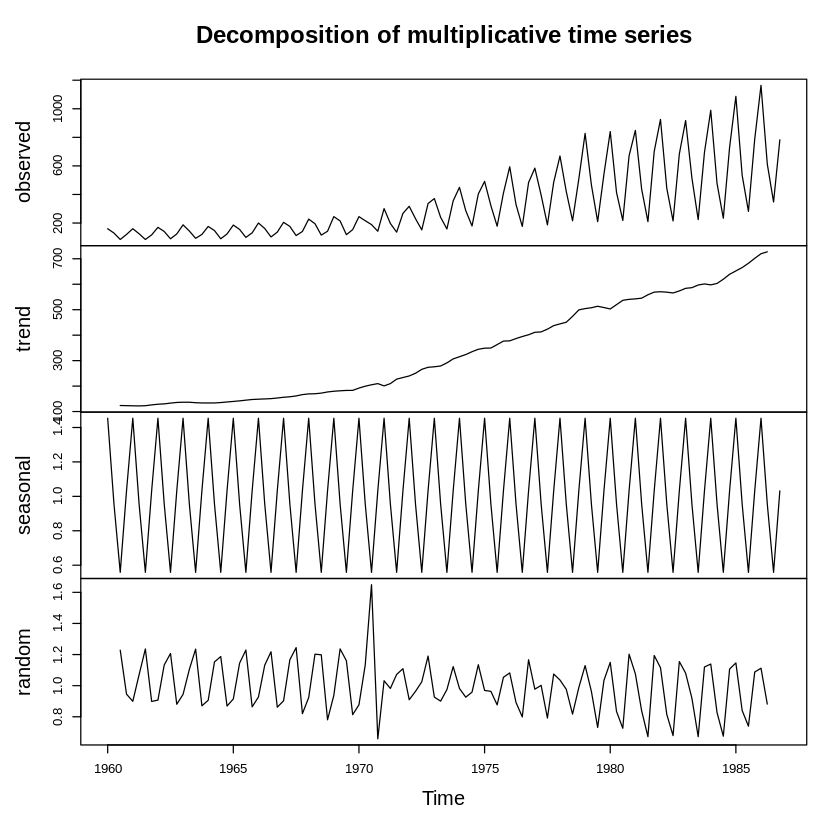

In [23]:
data("UKgas")
UKgas
a = decompose(UKgas, type = "multiplicative")
a
plot(a)

In [24]:
HW = HoltWinters(UKgas, seasonal = "mult")
HW
HW$SSE

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = UKgas, seasonal = "mult")

Smoothing parameters:
 alpha: 0.02412858
 beta : 1
 gamma: 0.7828624

Coefficients:
          [,1]
a  515.0263067
b    9.9725235
s1   2.3829116
s2   1.2182884
s3   0.6645498
s4   1.5453760

[1] 109759.2

In [25]:
HW1 = HoltWinters(UKgas, alpha = 0.2, seasonal = "mult")
HW1
HW1$SSE

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = UKgas, alpha = 0.2, seasonal = "mult")

Smoothing parameters:
 alpha: 0.2
 beta : 0.1123386
 gamma: 0.8863817

Coefficients:
          [,1]
a  564.2608555
b    8.3846271
s1   2.2137005
s2   1.1277098
s3   0.6050389
s4   1.4020962

[1] 125449.1

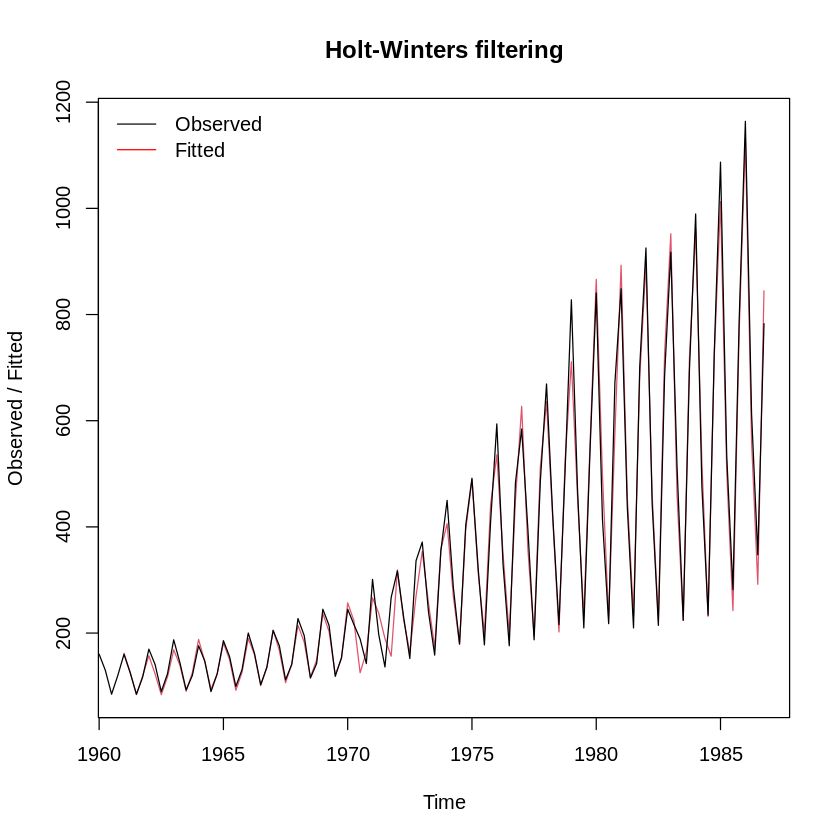

In [26]:
plot(HW)
legend("topleft", c("Observed", "Fitted"), col = c("black", "red"), lwd = 1, bty = "n")

,Qtr1,Qtr2,Qtr3,Qtr4
1987,1251.0258,651.7494,362.1424,857.5545


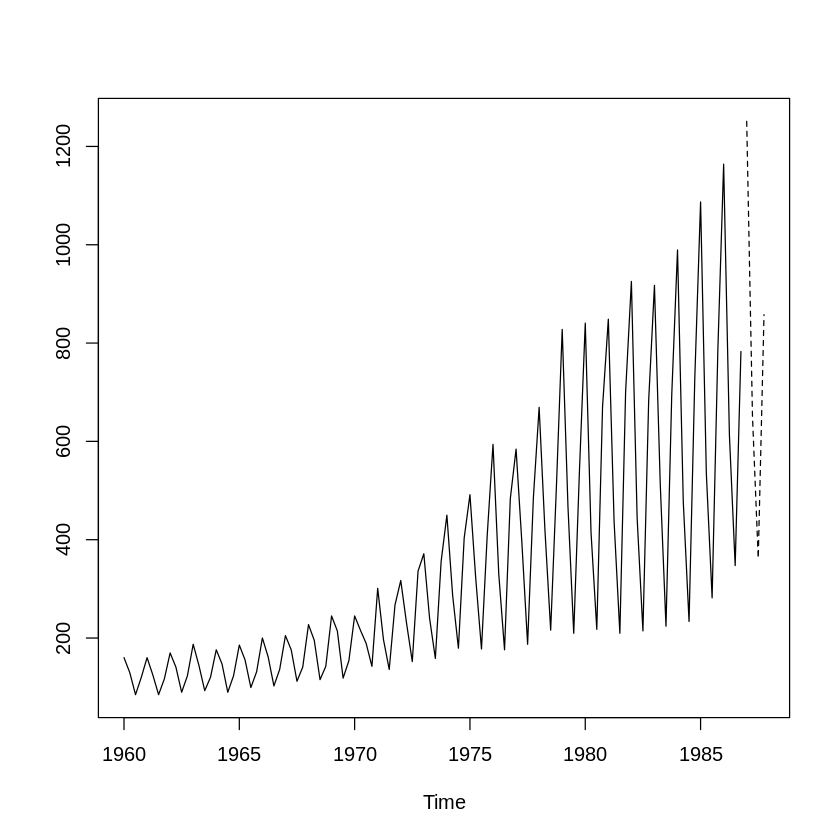

In [27]:
UKgas.pred = predict(HW, n.ahead = 4)
UKgas.pred
ts.plot(UKgas, UKgas.pred, lty = 1:2)

        Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
1987 Q1      1251.0258 1218.4552 1283.5964 1201.2133 1300.8383
1987 Q2       651.7494  619.1628  684.3360  601.9125  701.5863
1987 Q3       362.1424  329.5429  394.7418  312.2858  411.9990
1987 Q4       857.5545  849.3037  865.8053  844.9360  870.1730

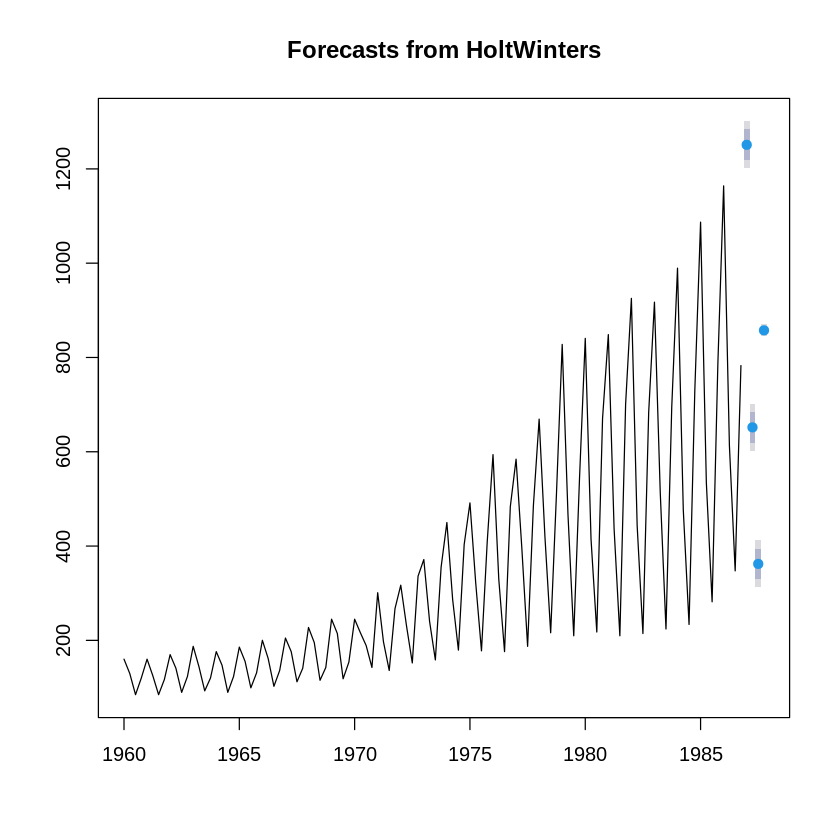

In [28]:
library(forecast)
f = forecast(HW, 4)
f
plot(f)

### 예제 6

In [29]:
HW1 = HoltWinters(USAccDeaths, beta = FALSE, gamma = FALSE)
HW2 = HoltWinters(USAccDeaths, gamma = FALSE)
HW3 = HoltWinters(USAccDeaths)

library(forecast)
accuracy(forecast(HW1, 3))
accuracy(forecast(HW2, 3))
accuracy(forecast(HW3, 3))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,3.281342,730.1586,643.4253,-0.3164865,7.403208,1.471527,0.02337667


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,122.736,809.085,698.7891,1.075738,7.960802,1.598146,0.09641956


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,61.39252,379.459,273.6166,0.7268148,3.208152,0.6257669,0.05689304


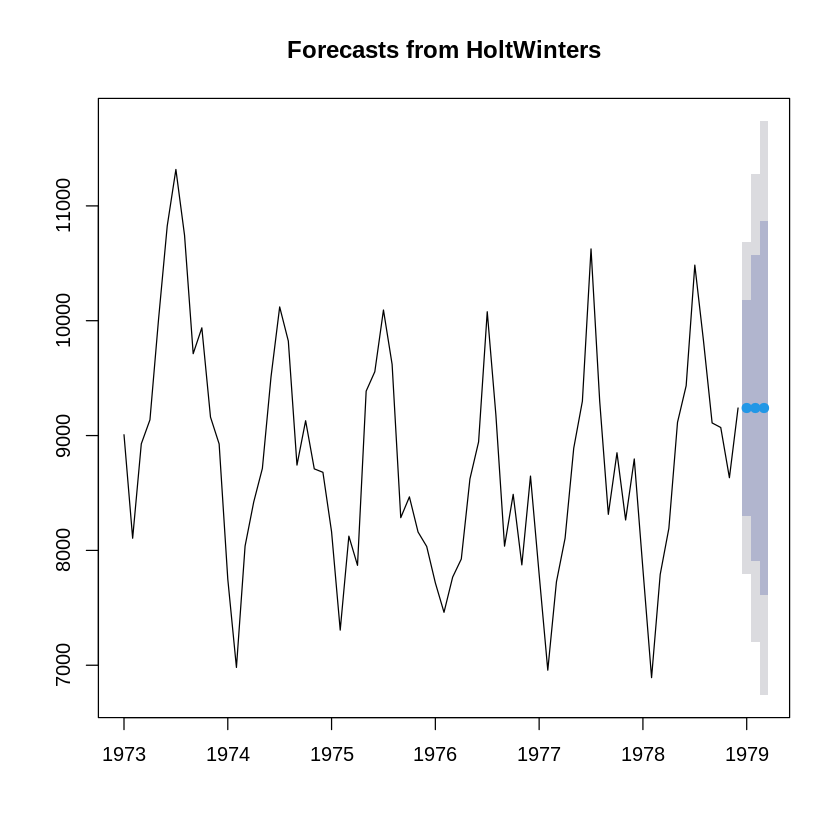

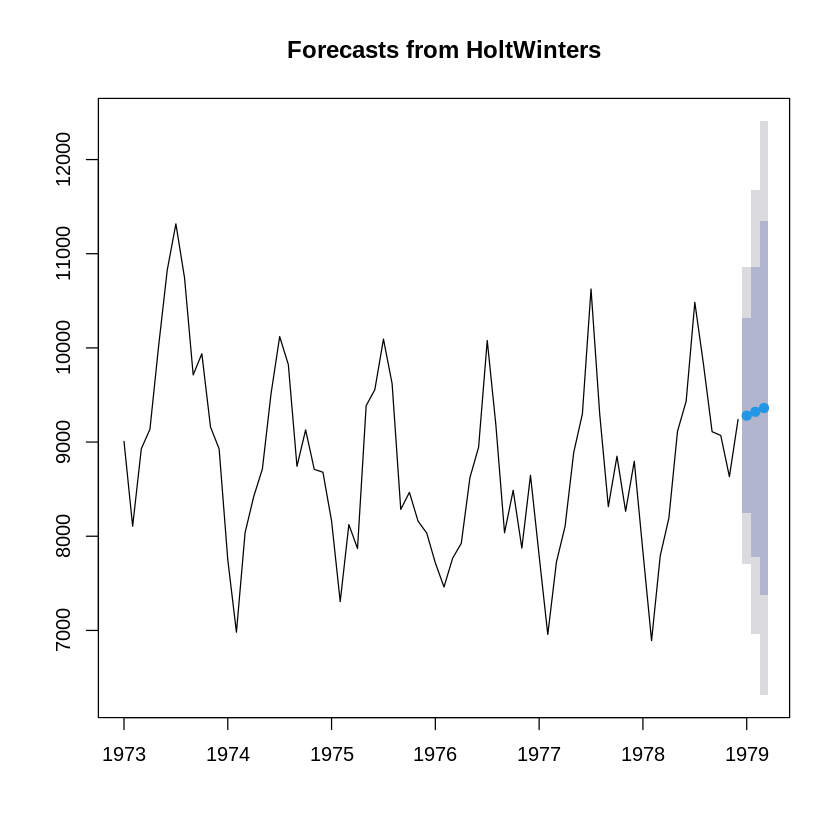

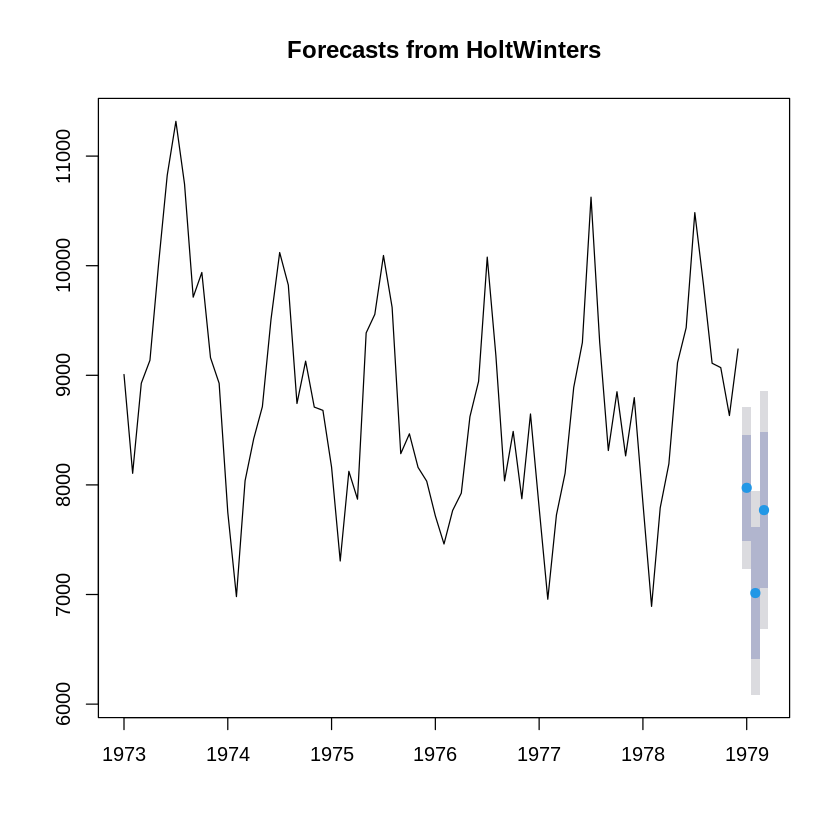

In [30]:
library(forecast)
plot(forecast(HW1, 3))
plot(forecast(HW2, 3))
plot(forecast(HW3, 3))

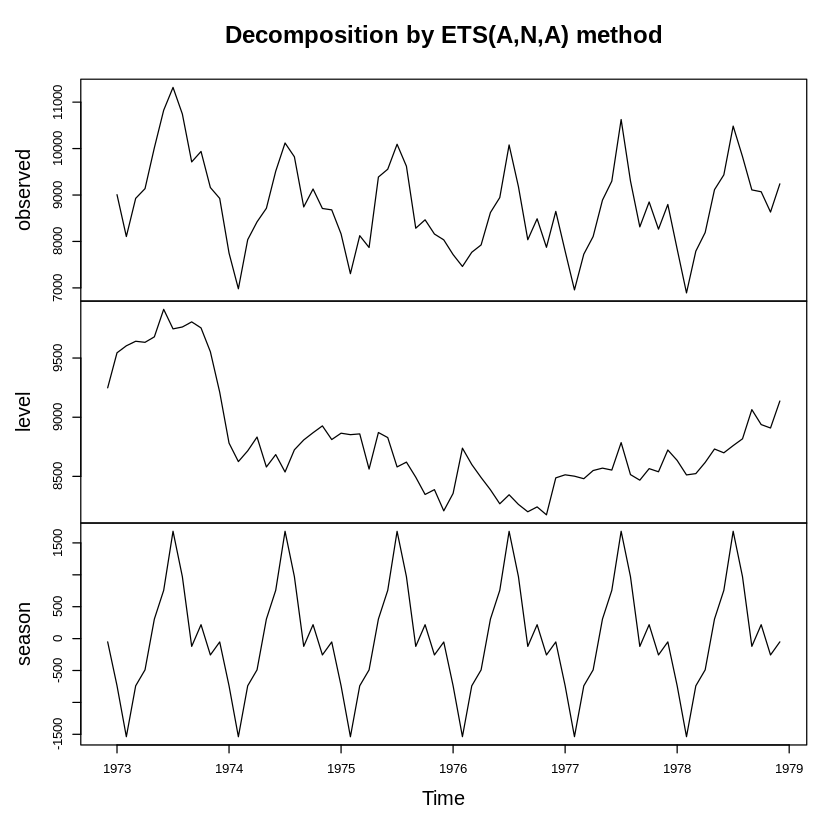

In [31]:
fit = ets(USAccDeaths)
plot(fit)

### 예제 7

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = AirPassengers, seasonal = "mult")

Smoothing parameters:
 alpha: 0.2755925
 beta : 0.03269295
 gamma: 0.8707292

Coefficients:
           [,1]
a   469.3232206
b     3.0215391
s1    0.9464611
s2    0.8829239
s3    0.9717369
s4    1.0304825
s5    1.0476884
s6    1.1805272
s7    1.3590778
s8    1.3331706
s9    1.1083381
s10   0.9868813
s11   0.8361333
s12   0.9209877

[1] "alpha"        "beta"         "call"         "coefficients" "fitted"      
[6] "gamma"        "seasonal"     "SSE"          "x"

,xhat,level,trend,season
Jan 1950,111.0818,124.3169,1.145688,0.8853778
Feb 1950,122.3315,126.6822,1.185561,0.9567027
Mar 1950,137.4390,128.9246,1.220110,1.0560479
Apr 1950,132.3234,131.0740,1.250491,0.9999918
May 1950,123.4797,133.0621,1.274608,0.9191803
Jun 1950,147.6673,134.7926,1.289510,1.0851340
Jul 1950,162.4432,136.4205,1.300576,1.1795086
Aug 1950,165.5296,139.4868,1.358300,1.1752602
Sep 1950,153.8877,141.8933,1.392571,1.0739905
Oct 1950,136.3186,144.3412,1.427070,0.9351739


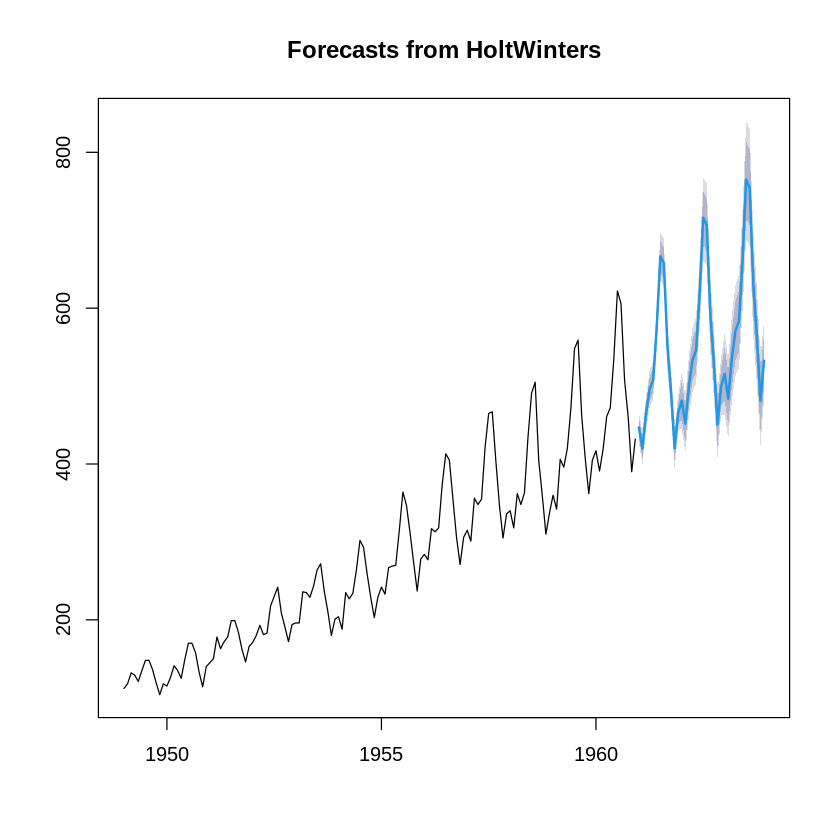

In [32]:
fit.m = HoltWinters(AirPassengers, seasonal = "mult")
fit.m
plot(forecast(fit.m, 36))
ls(fit.m)
fit.m$fitted

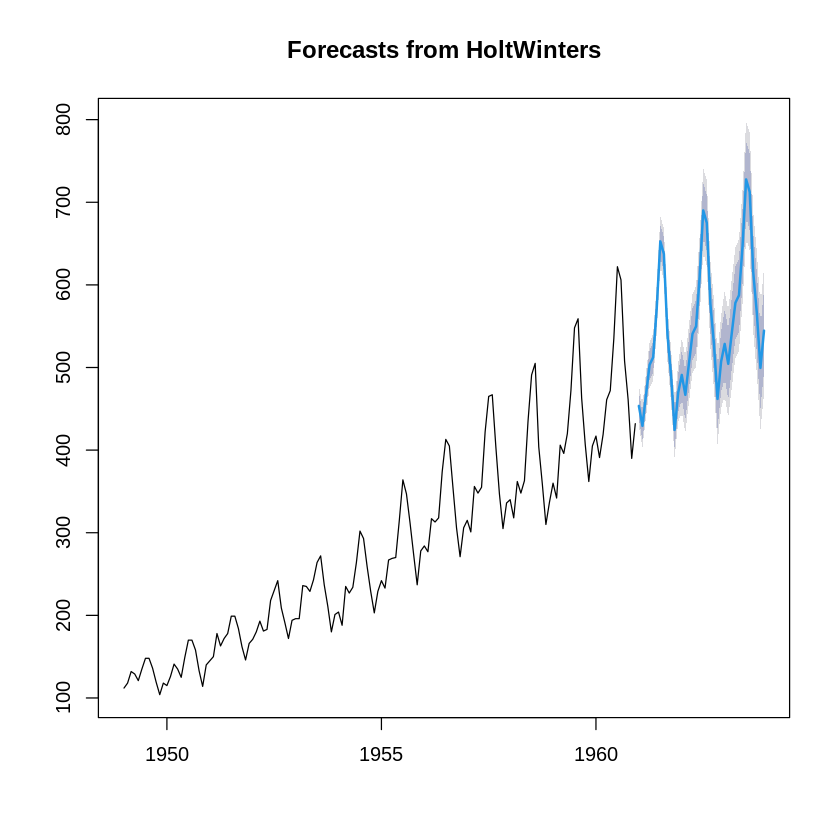

In [33]:
fit.a = HoltWinters(AirPassengers, seasonal = "additive")
plot(forecast(fit.a, 36))

## 예제 8

In [34]:
ap.1 = aggregate(ap, nfreq = 1)
fit.1 = HoltWinters(ap.1, gamma = FALSE, seasonal = "additive")
fit.1
ls(fit.1)
fit.1$fitted

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = ap.1, gamma = FALSE, seasonal = "additive")

Smoothing parameters:
 alpha: 0.3794192
 beta : 1
 gamma: FALSE

Coefficients:
       [,1]
a 5624.8333
b  465.3275

[1] "alpha"        "beta"         "call"         "coefficients" "fitted"      
[6] "gamma"        "seasonal"     "SSE"          "x"

,xhat,level,trend
1951,1832.000,1676.000,156.0000
1952,2147.356,1911.678,235.6780
1953,2547.432,2229.555,317.8769
1954,2981.083,2605.319,375.7642
1955,3270.277,2937.798,332.4788
1956,3707.265,3322.532,384.7337
1957,4267.848,3795.190,472.6583
1958,4856.724,4325.957,530.7670
1959,5171.432,4748.694,422.7373
1960,5570.317,5159.506,410.8116


     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1961       6090.161 5872.471 6307.851 5757.233 6423.089
1962       6555.488 6282.217 6828.760 6137.556 6973.421
1963       7020.816 6651.931 7389.700 6456.656 7584.976

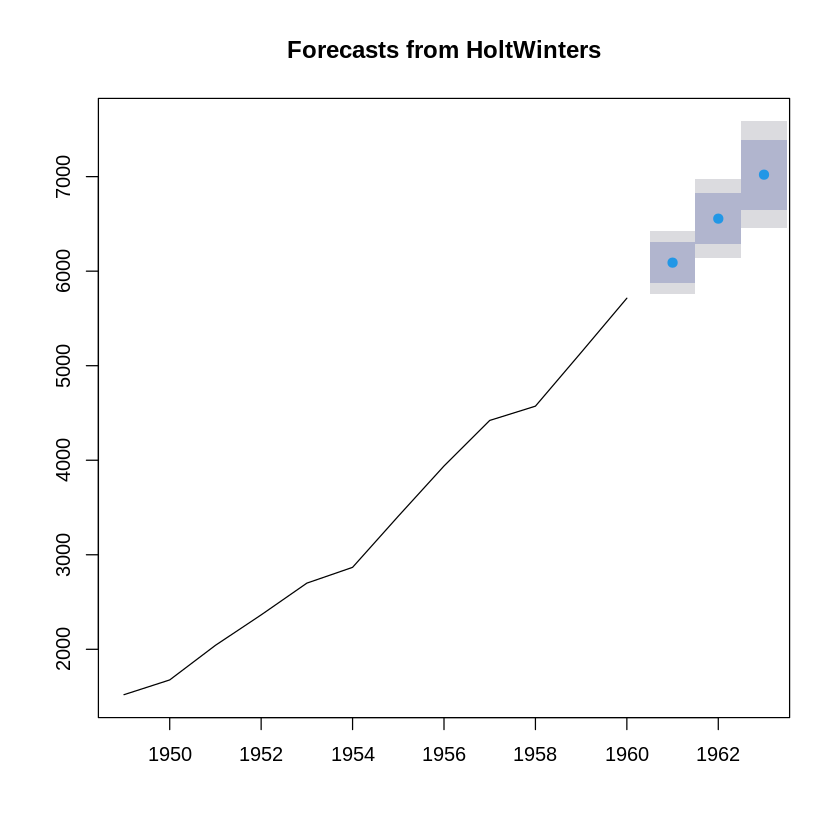

In [35]:
pred = forecast(fit.1, 3)
pred
plot(pred)